Лабораторная работа №2

Выполнил студент 3 курса 4 группы Ларин Егор

Вариант 6

Задача
$$u''+\frac{2}{x}u'=\frac{3}{x^2}$$
$$\frac{1}{2} \leq x \leq 1$$
$$u'(\frac{1}{2})=6, u(1)+u'(1)=3$$
$$u(x)=3\ln x$$
$$h=0.01$$

$
\begin{cases}
u_1 = u \\
u_2 = u'
\end{cases}
\Rightarrow 
\begin{cases}
u_1' = u_2\\
u_2' = \frac{3}{x^2} - \frac{2}{x}u_2 \\
u_1(1)+u_2(1) = 3 \\
u_2(\frac{1}{2}) = 6
\end{cases}$

$\alpha_1 = 0, \beta_1 = 1, \gamma_1 = 0$

$\alpha_2 = 0, \beta_2 = -\frac{2}{x}, \gamma_2 = \frac{3}{x^2}$

$p_1 = 0, q_1 = 1, r_1 = 6$

$p_2 = 1, q_2 = 1, r_2 = 3$

Первая задача Коши

$$\begin{cases}
u_1' = u_2\\
u_2' = \frac{3}{x^2} - \frac{2}{x}u_2 \\
u_1(\frac{1}{2}) = \eta_0 = 1 \\
u_2(\frac{1}{2}) = r_1 - \frac{p_1 \eta_0}{q_1} = 6
\end{cases}$$

Вторая задача Коши

$$\begin{cases}
u_1' = u_2\\
u_2' = \frac{3}{x^2} - \frac{2}{x}u_2 \\
u_1(\frac{1}{2}) = \eta_1 = 0 \\
u_2(\frac{1}{2}) = r_1 - \frac{p_1 \eta_1}{q_1} = 6
\end{cases}$$

$$
\psi_0 = p_2  \overline{u}_1 + q_2  \overline{u}_2 - r_2
$$

$$
\psi_1 = p_2  \hat{u}_1 + q2  \hat{u}_2 - r_2
$$

$$u = \frac{-\psi_0 \hat{u}_1 + \psi_1 \overline{u}_1} {\psi_1 - \psi_0}$$


Правило Рунге
$$
h_1 = 0.01, h2=0.02
$$

$$
Q = \max_{\omega_2} \frac{u_{1,1} - u_{1,2}}{h_2^2 - h_1^2} \cdot h_2^2 
$$

err = 0.0002646421861543698


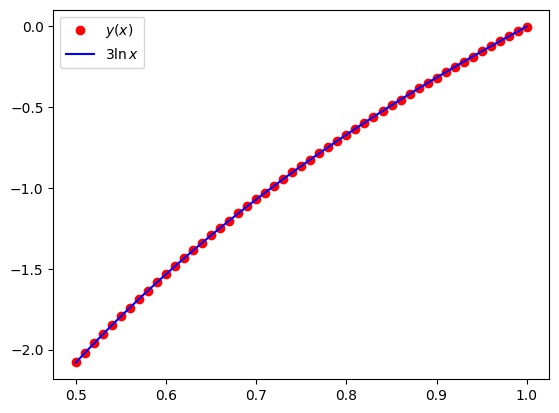

In [6]:
from matplotlib import pyplot as plt
from math import ceil, log

a = 0.5
b = 1.

r2 = 3
r1 = 6

p2 = 1
p1 = 0
q2 =1
q1 = 1

h = 0.01

def u(x):
    return 3 * log(x)

def f1(x, u1, u2):
    return u2

def f2(x, u1, u2):
    return 3 / x**2 - 2 / x * u2

def solve(h):
    n = ceil((b - a) / h) + 1
    xs = [a + i * h for i in range(n)]

    eta0 = 1
    eta1 = 0

    def runge(h, initial1):
        initial2 = (r1-p1*initial1) / q1
        ys = [[initial1, initial2]]
        for i in range(n-1):
            phi1 = f1(xs[i], ys[-1][0], ys[-1][1])
            phi2 = f2(xs[i], ys[-1][0], ys[-1][1])

            y1 = ys[-1][0] + h * f1(xs[i] + 0.5 * h, ys[-1][0] + 0.5 * h * phi1, ys[-1][1]+0.5* h * phi2)
            y2 = ys[-1][1] + h * f2(xs[i] + 0.5 * h, ys[-1][0] + 0.5 * h * phi1, ys[-1][1]+0.5* h * phi2)

            ys.append([y1, y2])

        return ys

    u0 = runge(h, eta0)
    u1 = runge(h, eta1)

    psi0 = p2 * u0[-1][0] + q2 * u0[-1][1] - r2
    psi1 = p2 * u1[-1][0] + q2 * u1[-1][1] - r2

    u = [(-psi0*y1[0] + psi1*y0[0]) / (psi1 - psi0) for (y0, y1) in zip(u0, u1)]

    return u

h2 = 0.01
h1 = 0.02

u1_ = solve(h1)
u2_ = solve(h2)

n = ceil((b - a) / h2) + 1
xs = [a + i * h for i in range(n)]

err = max([(u1_[i] - u2_[i*2]) / (h2**2 - h1**2) for i in range(len(u1_))]) * h2**2
print(f"{err = }")

plt.plot(xs, u2_, "ro", xs, [u(x) for x in xs], "b")
plt.legend(["$y(x)$",  "$3\\ln x$"])
plt.show()

Выводы

Компьютерным экспериментом подтверждается, что метод стрельбы с использованием метода средних прямоугольников Рунге-Кутта при оценке правилом Рунге дает решение с заданной точностью, которое достаточно близко к точному решению.